In [30]:
# importar arquivo como csv

import pandas as pd

combined_csv = pd.read_csv(r"C:\Users\Marcelo\Documents\Hackaton\combined_csv.csv", index_col=None, header=0)

print(combined_csv.shape)

(1499999, 8)


C:\Users\Marcelo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
combined_csv.head()

,encrypted_domain,encrypted_cnpj,encrypted_saleid,dateTime,productTotal,prod_fullname,encrypted_buyer_cpf,encrypted_buyer_cnpj
0,6139646137356433363237396637323937336161383832...,21404ebaa0106ca20ae283c89271,3630643234373336643037313439636562303565393630...,2018-11-19T16:40:45.000Z,100.005,gasolina comum,NaN,NaN
1,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3261383131366661633864353433656333303337646536...,2018-12-07T09:56:37.000Z,50.0008,filtro pel 107 tec fil,NaN,NaN
2,6139646137356433363237396637323937336161383832...,21404ebaa0106ca20ae283c89271,6364633832333939393439623930373034393366626462...,2018-10-18T08:29:47.000Z,10.0514,gasolina comum,NaN,NaN
3,6139646137356433363237396637323937336161383832...,8ef4d40b852168ea8e3bbc4c89a0,3231383536386136336562643333306531303434343463...,2018-10-15T09:18:55.000Z,180.004,gasolina comum,NaN,NaN
4,6139646137356433363237396637323937336161383832...,8ef4d40b852168ea8e3bbc4c89a0,3864633636396239353161643761343839323436653162...,2018-10-07T00:41:16.000Z,19.9623,gasolina comum,NaN,NaN


In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import pylab as pl
from mpl_toolkits import mplot3d
import plotly.graph_objs as go
from sklearn.cluster import SpectralClustering
import plotly as py

In [268]:
stores = pd.read_csv(r"C:\Users\Marcelo\Documents\Hackaton\stores_details.csv",index_col=None, header=0)

In [269]:
#Remove colunas desncessarias de stores

#stores.drop("encrypted_cnpj", inplace=True, axis=1)
stores.drop("encrypted_cnpj_prefix", inplace=True, axis=1)
stores.drop("encrypted_5_zipcode", inplace=True, axis=1)
stores.drop("encrypted_domain", inplace=True, axis=1)
stores.drop("cnae_desc", inplace=True, axis=1)


In [270]:
#Normaliza dados
stores = stores.fillna(0)
stores = stores.round(1)
stores['cnae_code'] = stores['cnae_code'].round(0)
stores['cnae_code'] = stores.cnae_code.astype(int)
stores.head()

,encrypted_cnpj,cnae_code,cheque,crediario,credito,debito,deposito,dinheiro,transferencia
0,9cddb8b88228cd7c4eead0b03bfd,4731800,0.0,0.0,0.7,0.3,0.0,0.0,0.0
1,f50e53c6e2570b43d15ec7dfcf92,4731800,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,d217627b20f7ab446b8250149f40,5611203,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,c07be06f611961763b7c190534c0,4731800,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5dc07a1ef6f3839d858729107f26,4731800,0.1,0.0,0.2,0.8,0.0,0.0,0.0


In [310]:
stores_4731800 = stores[stores['cnae_code']==4731800]

In [311]:
info_4731800 = pd.merge(combined_csv, stores_4731800, on='encrypted_cnpj')
info_4731800['productTotal'] = info_4731800.productTotal.astype(float)
info_4731800['productTotal'] = info_4731800['productTotal'].round(0)
print(info_4731800.shape)
info_4731800.head()

(375750, 16)


,encrypted_domain,encrypted_cnpj,encrypted_saleid,dateTime,productTotal,prod_fullname,encrypted_buyer_cpf,encrypted_buyer_cnpj,cnae_code,cheque,crediario,credito,debito,deposito,dinheiro,transferencia
0,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3261383131366661633864353433656333303337646536...,2018-12-07T09:56:37.000Z,50.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0
1,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3764393733646664636238313766383333383866383532...,2018-11-30T09:06:04.000Z,60.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0
2,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3463383031373163313430383163366539313233356531...,2018-12-28T21:36:50.000Z,5.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0
3,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3766613662643032386635383130383637303938313237...,2018-12-01T20:25:05.000Z,50.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0
4,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,6137363134393331366162376463653431633932663965...,2018-10-05T19:07:34.000Z,50.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0


In [312]:
info_4731800['Total'] = info_4731800['productTotal'].groupby(info_4731800['encrypted_cnpj']).transform('sum')

In [313]:
info_4731800.head()

,encrypted_domain,encrypted_cnpj,encrypted_saleid,dateTime,productTotal,prod_fullname,encrypted_buyer_cpf,encrypted_buyer_cnpj,cnae_code,cheque,crediario,credito,debito,deposito,dinheiro,transferencia,Total
0,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3261383131366661633864353433656333303337646536...,2018-12-07T09:56:37.000Z,50.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0,182186.0
1,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3764393733646664636238313766383333383866383532...,2018-11-30T09:06:04.000Z,60.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0,182186.0
2,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3463383031373163313430383163366539313233356531...,2018-12-28T21:36:50.000Z,5.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0,182186.0
3,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3766613662643032386635383130383637303938313237...,2018-12-01T20:25:05.000Z,50.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0,182186.0
4,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,6137363134393331366162376463653431633932663965...,2018-10-05T19:07:34.000Z,50.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0,182186.0


In [314]:
info_4731800.drop("encrypted_domain", inplace=True, axis=1)
info_4731800.drop("encrypted_saleid", inplace=True, axis=1)
info_4731800.drop("productTotal", inplace=True, axis=1)
info_4731800.drop("prod_fullname", inplace=True, axis=1)
info_4731800.drop("encrypted_buyer_cpf", inplace=True, axis=1)
info_4731800.drop("encrypted_buyer_cnpj", inplace=True, axis=1)
info_4731800.drop("cnae_code", inplace=True, axis=1)
info_4731800.drop("dateTime", inplace=True, axis=1)
info_4731800.drop("encrypted_cnpj", inplace=True, axis=1)
info_4731800.drop("crediario", inplace=True, axis=1)
info_4731800.drop("deposito", inplace=True, axis=1)
info_4731800.drop("transferencia", inplace=True, axis=1)

In [315]:
info_4731800.head()

,cheque,credito,debito,dinheiro,Total
0,0.0,0.0,0.1,0.9,182186.0
1,0.0,0.0,0.1,0.9,182186.0
2,0.0,0.0,0.1,0.9,182186.0
3,0.0,0.0,0.1,0.9,182186.0
4,0.0,0.0,0.1,0.9,182186.0


In [316]:
info_4731800 = info_4731800.drop_duplicates()
info_4731800.head()

,cheque,credito,debito,dinheiro,Total
0,0.0,0.0,0.1,0.9,182186.0
4761,0.0,0.1,0.2,0.8,293938.0
10497,0.0,0.0,0.0,0.0,147331.0
12984,0.1,0.2,0.8,0.0,59373.0
14602,0.0,0.0,0.0,0.9,186694.0


In [331]:
features = ['cheque', 'credito', 'debito', 'dinheiro']

# Separating out the features
x = info_4731800.loc[:, features].values
# Separating out the target
y = info_4731800.loc[:, ['Total']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

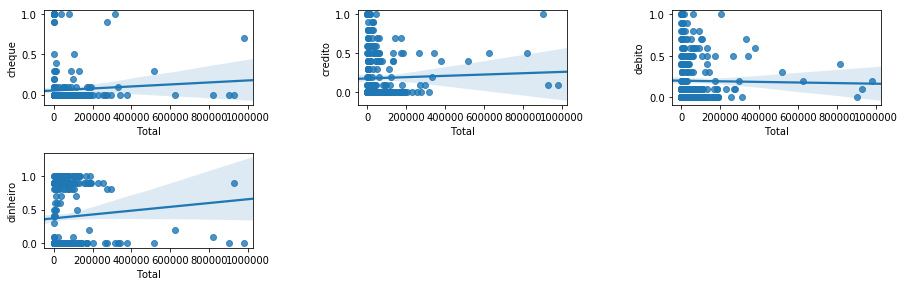

In [332]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for i in ['Total']:
    for j in ['cheque' , 'credito', 'debito', 'dinheiro']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = i , y = j , data = info_4731800)
        plt.ylabel(j.split()[0]+' '+j.split()[1] if len(j.split()) > 1 else j )
plt.show()

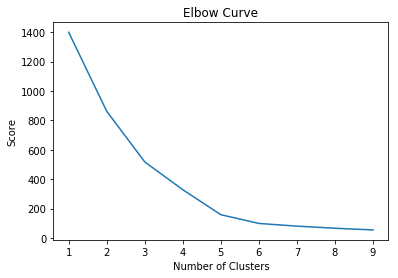

In [336]:
Nc = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(x).inertia_ for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [85]:
test = stores.head(488)
train = stores.tail(1140)

In [205]:
X = np.array(train.drop(['cnae_code'], 1).astype(float))

In [206]:
y = np.array(train['cnae_code'])

In [207]:
features = ['cheque', 'crediario', 'credito', 'debito', 'deposito', 'dinheiro', 'transferencia']

# Separating out the features
x = stores.loc[:, features].values
# Separating out the target
y = stores.loc[:, ['cnae_code']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [208]:
pca = PCA(n_components=2).fit(x)
pca_2d = pca.transform(x)
pca_2d

array([[ 1.67333064e+00, -5.17160230e-01],
       [ 1.66720152e+00, -6.25835192e-01],
       [ 1.66720152e+00, -6.25835192e-01],
       [ 1.70011760e+00,  1.23694673e-01],
       [-1.48443887e-01,  1.75409893e-01],
       [-1.48443887e-01,  1.75409893e-01],
       [ 1.68763191e+00, -2.63585317e-01],
       [ 1.67945975e+00, -4.08485267e-01],
       [-1.48443887e-01,  1.75409893e-01],
       [-1.61868444e+00, -3.83887387e-01],
       [ 1.68558887e+00, -2.99810304e-01],
       [ 1.67741672e+00, -4.44710255e-01],
       [-1.61868444e+00, -3.83887387e-01],
       [ 5.16338209e-01,  3.22559610e+00],
       [-1.61868444e+00, -3.83887387e-01],
       [ 1.34538814e+00,  5.98773706e-01],
       [-1.47166039e+00, -3.27957659e-01],
       [ 1.50833787e+00,  2.26942441e-02],
       [-1.48443887e-01,  1.75409893e-01],
       [-1.28805281e+00, -3.71857180e-01],
       [ 1.67741672e+00, -4.44710255e-01],
       [ 1.66720152e+00, -6.25835192e-01],
       [ 1.67741672e+00, -4.44710255e-01],
       [-1.

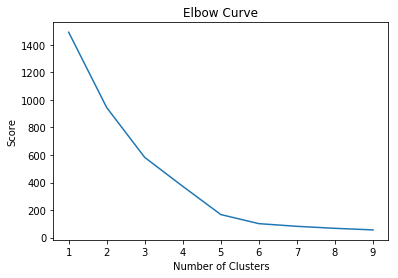

In [209]:
Nc = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(x).inertia_ for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [210]:
reduced_data = PCA(n_components=2).fit(x)
pca_2d = pca.transform(x)
#kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
#kmeans.fit(reduced_data)

kmeans= KMeans(n_clusters=5,init='k-means++', random_state=0)
kmeans.fit(pca_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

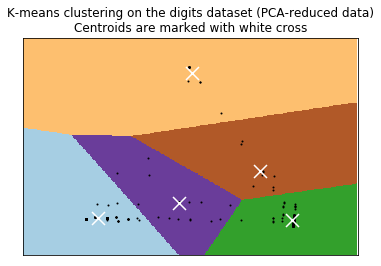

In [213]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = pca_2d[:, 0].min() - 1, pca_2d[:, 0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1, pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(pca_2d[:, 0], pca_2d[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [150]:
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labelsS = model.fit_predict(x)

C:\Users\Marcelo\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


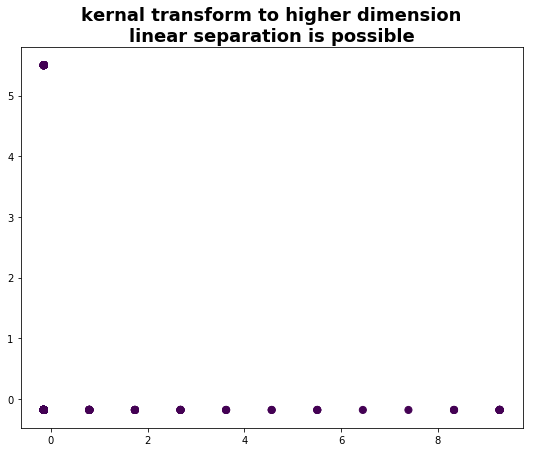

In [151]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('kernal transform to higher dimension\nlinear separation is possible', fontsize=18, fontweight='demi')
plt.scatter(x[:, 0], x[:, 1], c=labelsS, s=50, cmap='viridis')